In [1]:
#Import different needed quantities from Flow:
import flow
from importlib import reload
reload(flow)


from flow.networks.ring import RingNetwork
from flow.core.params import VehicleParams
from flow.controllers.car_following_models import IDMController #Human driving model
from flow.controllers.routing_controllers import ContinuousRouter #Router that keeps vehicles on the ring-road

#Lane change controllers:
# from flow.controllers.lane


from flow.networks.ring import ADDITIONAL_NET_PARAMS
from flow.core.params import NetParams
from flow.core.params import InitialConfig
from flow.core.params import TrafficLightParams
from flow.envs.ring.accel import AccelEnv
from flow.envs.ring.accel import ADDITIONAL_ENV_PARAMS
from flow.core.params import SumoParams
from flow.core.params import EnvParams
from flow.core.params import SumoCarFollowingParams
from flow.core.experiment import Experiment

from sklearn.cluster import KMeans


# from Adversaries.controllers.car_following_adversarial import FollowerStopper_Overreact

from Adversaries.controllers.base_controller import BaseController


import os
import numpy as np


def run_ring_sim_variable_cfm(ring_length=600,
    driver_controller_list=None,
    num_lanes=1,
    sim_time=500,
    want_render=False,
    emission_path='data'):
    

    #There is an updated version of this that

    #Simulation parameters:
    time_step = 0.1 #In seconds, how far each step of the simulation goes.
    sim_horizon = int(np.floor(sim_time/time_step)) #How many simulation steps will be taken -> Runs for 300 seconds

    #initialize the simulation using above parameters:
    traffic_lights = TrafficLightParams() #This is empty, so no traffic lights are used.
    initial_config = InitialConfig(shuffle=True,spacing="uniform", perturbation=1) #Vehicles start out evenly spaced.
    vehicles = VehicleParams() #The vehicles object will store different classes of drivers:
    sim_params = SumoParams(sim_step=time_step, render=want_render, emission_path=emission_path) #Sets the simulation time-step and where data will be recorded.
    env_params = EnvParams(additional_params=ADDITIONAL_ENV_PARAMS)
    net_params = NetParams(additional_params={'length':ring_length,
                                              'lanes':num_lanes,
                                              'speed_limit': 30,
                                              'resolution': 40})

    if(driver_controller_list is None):
        print('Running IDM.')
        num_human_drivers = 40
        #Default to the IDM if otherwise controllers not specified:
        vehicles.add("idm_driver",
            acceleration_controller=(IDMController, {'noise':0.1}),
            routing_controller=(ContinuousRouter, {}),
            car_following_params=SumoCarFollowingParams(speed_mode=0),
            num_vehicles=num_human_drivers)

    else:
        print('Number of classes of driver: '+str(len(driver_controller_list)))
        for driver in driver_controller_list:

            if(len(driver)==3):
                label = driver[0]
                cfm_controller = driver[1]
                num_vehicles = driver[2]
                if('adv' in label):
                    vehicles.add(label,
                                 color="red",
                                 acceleration_controller = cfm_controller,routing_controller=(ContinuousRouter, {}),
                                 car_following_params=SumoCarFollowingParams(speed_mode=0),
                                 num_vehicles=num_vehicles)
                    
                else:
                    vehicles.add(label,
                                 acceleration_controller = cfm_controller,routing_controller=(ContinuousRouter, {}),
                                 car_following_params=SumoCarFollowingParams(speed_mode=0),
                                 num_vehicles=num_vehicles)
                
                

            else:
                label = driver[0]
                cfm_controller = driver[1]
                lc_controller = driver[2]
                num_vehicles = driver[3]

#                 vehicles.add(label,
#                     acceleration_controller = cfm_controller,
#                     lane_change_controller = lc_controller,
#                     routing_controller=(ContinuousRouter, {}),
#                     car_following_params=SumoCarFollowingParams(speed_mode=0),
#                     num_vehicles=num_vehicles)
                
                
                if('adv' in label):
                    vehicles.add(label,
                                 color="red",
                                 acceleration_controller = cfm_controller,routing_controller=(ContinuousRouter, {}),
                                 lane_change_controller = lc_controller,
                                 car_following_params=SumoCarFollowingParams(speed_mode=0),
                                 num_vehicles=num_vehicles)
                    
                else:
                    vehicles.add(label,
                                 acceleration_controller = cfm_controller,routing_controller=(ContinuousRouter, {}),
                                 lane_change_controller = lc_controller,
                                 car_following_params=SumoCarFollowingParams(speed_mode=0),
                                 num_vehicles=num_vehicles)


    #initialize the simulation:
    flow_params = dict(
        exp_tag='ring_variable_cfm',
        env_name=AccelEnv,
        network=RingNetwork,
        simulator='traci',
        sim=sim_params,
        env=env_params,
        net=net_params,
        veh=vehicles,
        initial=initial_config,
        tls=traffic_lights,
    )

    flow_params['env'].horizon = sim_horizon
    exp = Experiment(flow_params)
    print('Running ring simulation, ring length: '+str(ring_length))
    
    sim_res_list = exp.run(1, convert_to_csv=True)
    
    return sim_res_list

print('Sim function defined.')

Sim function defined.


In [2]:
from attack_param_sweep_single_lane import make_mal_driver_list as make_mal_driver_list_single_lane

driver_list_single_lane = make_mal_driver_list_single_lane()

sim_res_list = run_ring_sim_variable_cfm(driver_controller_list=driver_list_single_lane,num_lanes=1,want_render=True)


(<class 'Adversaries.controllers.car_following_adversarial.ACC_Switched_Controller_Attacked'>, {'k_1': 1.5071021905434296, 'k_2': 0.38651279967839947, 'h': 1.7813422414205562, 'V_m': 13.691834835837245, 'd_min': 10.0, 'want_multiple_attacks': True, 'Total_Attack_Duration': 3.0, 'attack_decel_rate': -0.8, 'warmup_steps': 500, 'SS_Threshold_min': 60, 'display_attack_info': True})
(<class 'Adversaries.controllers.car_following_adversarial.ACC_Switched_Controller_Attacked'>, {'k_1': 1.5142327874546537, 'k_2': 0.1662466059283202, 'h': 1.5928547394505599, 'V_m': 13.693913948944541, 'd_min': 10.0, 'want_multiple_attacks': True, 'Total_Attack_Duration': 3.0, 'attack_decel_rate': -0.8, 'warmup_steps': 500, 'SS_Threshold_min': 60, 'display_attack_info': True})
Number of classes of driver: 40
Running ring simulation, ring length: 600
Spawning compromised ACC, attack frequency: 75.1876975132218
Will engage in multiple attacks.
Spawning compromised ACC, attack frequency: 79.22601456689215
Will enga

FatalTraCIError: connection closed by SUMO

In [4]:
from attack_param_sweep_double_lane import make_mal_driver_list as make_mal_driver_list_double_lane

driver_list_double_lane = make_mal_driver_list_double_lane()

sim_res_list = run_ring_sim_variable_cfm(driver_controller_list=driver_list_double_lane,num_lanes=2,want_render=True)


(<class 'Adversaries.controllers.car_following_adversarial.ACC_Switched_Controller_Attacked'>, {'k_1': 1.3524388019096445, 'k_2': 0.11117473160410657, 'h': 1.7853608515509958, 'V_m': 15.716942542912506, 'd_min': 10.0, 'want_multiple_attacks': True, 'Total_Attack_Duration': 3.0, 'attack_decel_rate': -0.8, 'warmup_steps': 500, 'SS_Threshold_min': 60, 'display_attack_info': True})
(<class 'Adversaries.controllers.car_following_adversarial.ACC_Switched_Controller_Attacked'>, {'k_1': 1.620600410819106, 'k_2': 0.03792647848245187, 'h': 2.0542776208209714, 'V_m': 15.685091991034867, 'd_min': 10.0, 'want_multiple_attacks': True, 'Total_Attack_Duration': 3.0, 'attack_decel_rate': -0.8, 'warmup_steps': 500, 'SS_Threshold_min': 60, 'display_attack_info': True})
Number of classes of driver: 78
Running ring simulation, ring length: 600
Spawning compromised ACC, attack frequency: 75.7355315785223
Will engage in multiple attacks.
Spawning compromised ACC, attack frequency: 62.37628562597323
Will enga

FatalTraCIError: connection closed by SUMO

In [9]:
from Detectors.Deep_Learning.AutoEncoders.utils import SeqDataset,train_epoch,eval_data,train_model,get_cnn_lstm_ae_model,make_train_X,sliding_window_mult_feat
from Detectors.Deep_Learning.AutoEncoders.utils import get_loss_filter_indiv as loss_smooth
from Detectors.Deep_Learning.AutoEncoders.cnn_lstm_ae import CNNRecurrentAutoencoder


import flow.visualize.visualize_ring as visualize_ring
from flow.visualize.visualize_ring import get_measured_leader,get_rel_dist_to_measured_leader,get_vel_of_measured_leader


import Detectors.Deep_Learning.AutoEncoders.utils
reload(Detectors.Deep_Learning.AutoEncoders.utils)
from Detectors.Deep_Learning.AutoEncoders.utils import SeqDataset,train_epoch,eval_data,train_model

import torch

# Anti-Flow specific functions for  detection:

from Detectors.Deep_Learning.AutoEncoders.utils import sliding_window
from Detectors.Deep_Learning.AutoEncoders.cnn_lstm_ae import CNNRecurrentAutoencoder

model = get_cnn_lstm_ae_model(n_features=4)

# Load in a trained model:
MODEL_PATH = '/Users/vanderbilt/Desktop/Research_2022/Anti-Flow/detector_dev/models/cnn_lstm_ae_ringlength600_1lane__1.0percentGPS.pt'
model.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device('cpu')))

no_attack_file_path = 'data/ring_variable_cfm_20220530-1010581653923458.5404868-0_emission.csv'

In [46]:
import process_losses_ring_attack
reload(process_losses_ring_attack)

from process_losses_ring_attack import get_losses_complete_obs

warmup = 150

no_attack_losses_dict = get_losses_complete_obs(no_attack_file_path,model,warmup_period=warmup)
print('Finished getting losses.')

Data loaded.
Vehicles processed: 40

Finished getting losses.


In [47]:
attack_file_path = '/Volumes/My Passport for Mac/single_lane_ring_road_attack_parameter_sweep/ring_600m_single_lane_TAD_10.0_ADR_-0.75_ver_10.csv'

attack_losses_dict = get_losses_complete_obs(attack_file_path,model,warmup_period=warmup)

Data loaded.
Vehicles processed: 40



Data loaded.


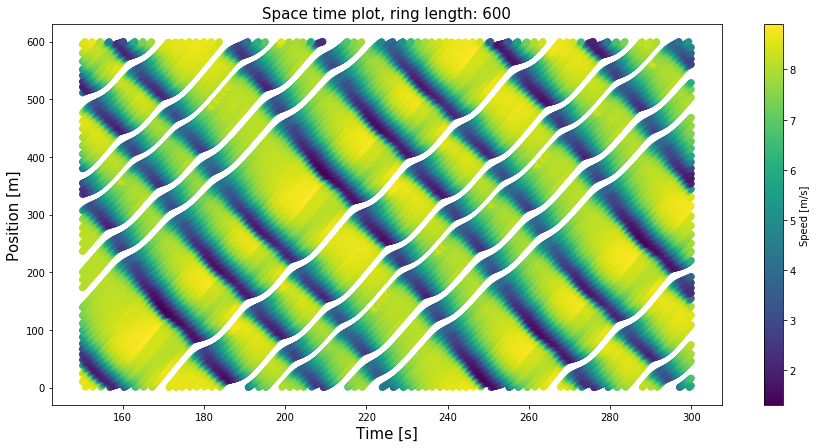

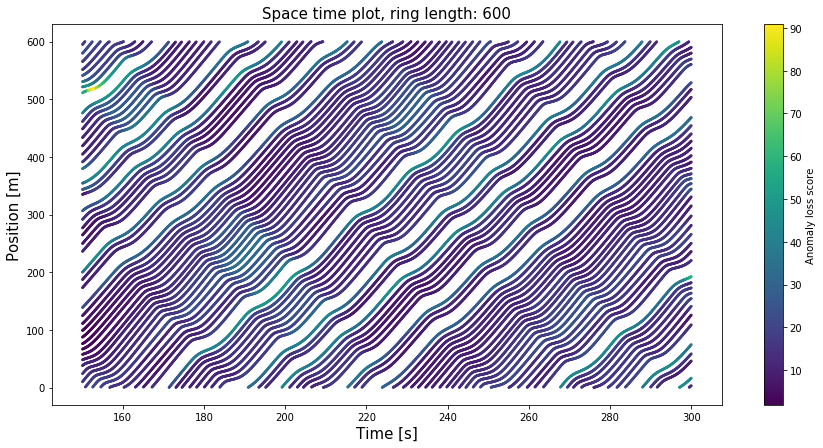

In [48]:
import flow.visualize.visualize_ring
reload(flow.visualize.visualize_ring)

from flow.visualize.visualize_ring import get_sim_data_dict_ring,make_ring_spacetime_fig,make_ring_spacetime_fig_with_losses

no_attack_sim_data_dict = get_sim_data_dict_ring(no_attack_file_path,warmup_period=warmup)

make_ring_spacetime_fig(sim_data_dict=no_attack_sim_data_dict,csv_path = no_attack_file_path,ring_length=600)



make_ring_spacetime_fig_with_losses(losses_smoothed = no_attack_losses_dict,
                                    csv_path = no_attack_file_path,
                                    sim_data_dict = no_attack_sim_data_dict,
                                    ring_length=600)



Data loaded.


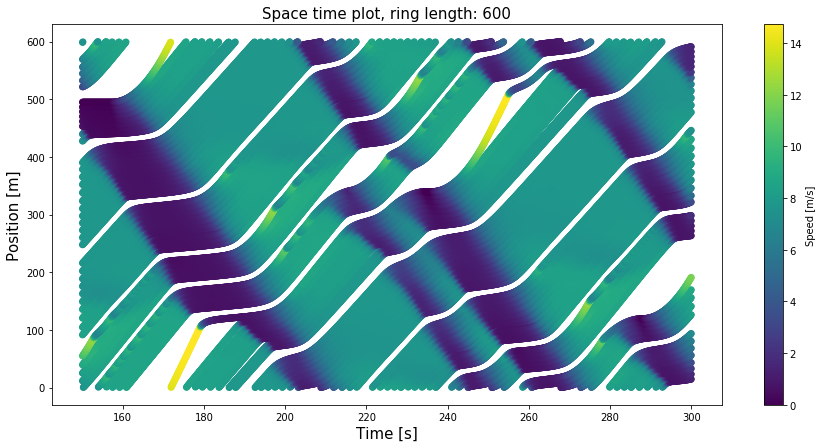

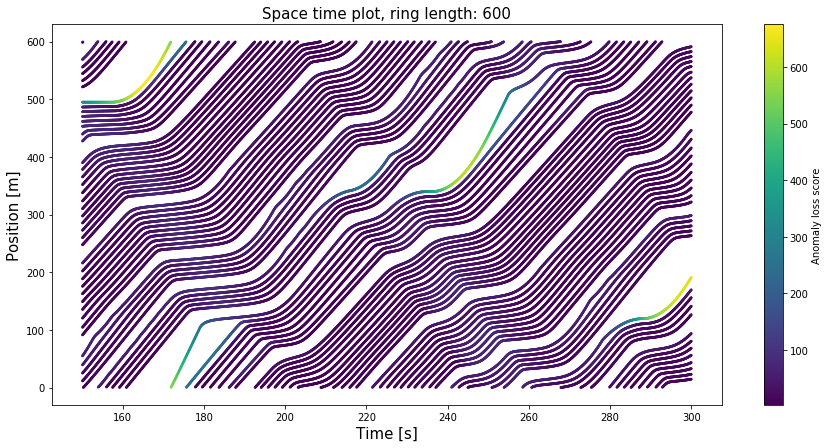

In [49]:
warmup = 150.0

attack_sim_data_dict = get_sim_data_dict_ring(attack_file_path,warmup_period=warmup)

make_ring_spacetime_fig(sim_data_dict=attack_sim_data_dict,csv_path = attack_file_path,ring_length=600)

make_ring_spacetime_fig_with_losses(losses_smoothed = attack_losses_dict,
                                    csv_path = attack_file_path,
                                    sim_data_dict = attack_sim_data_dict,
                                    ring_length=600)


Text(0.5, 0.98, 'Single lane ring AE rec. error: benign vs. attacked')

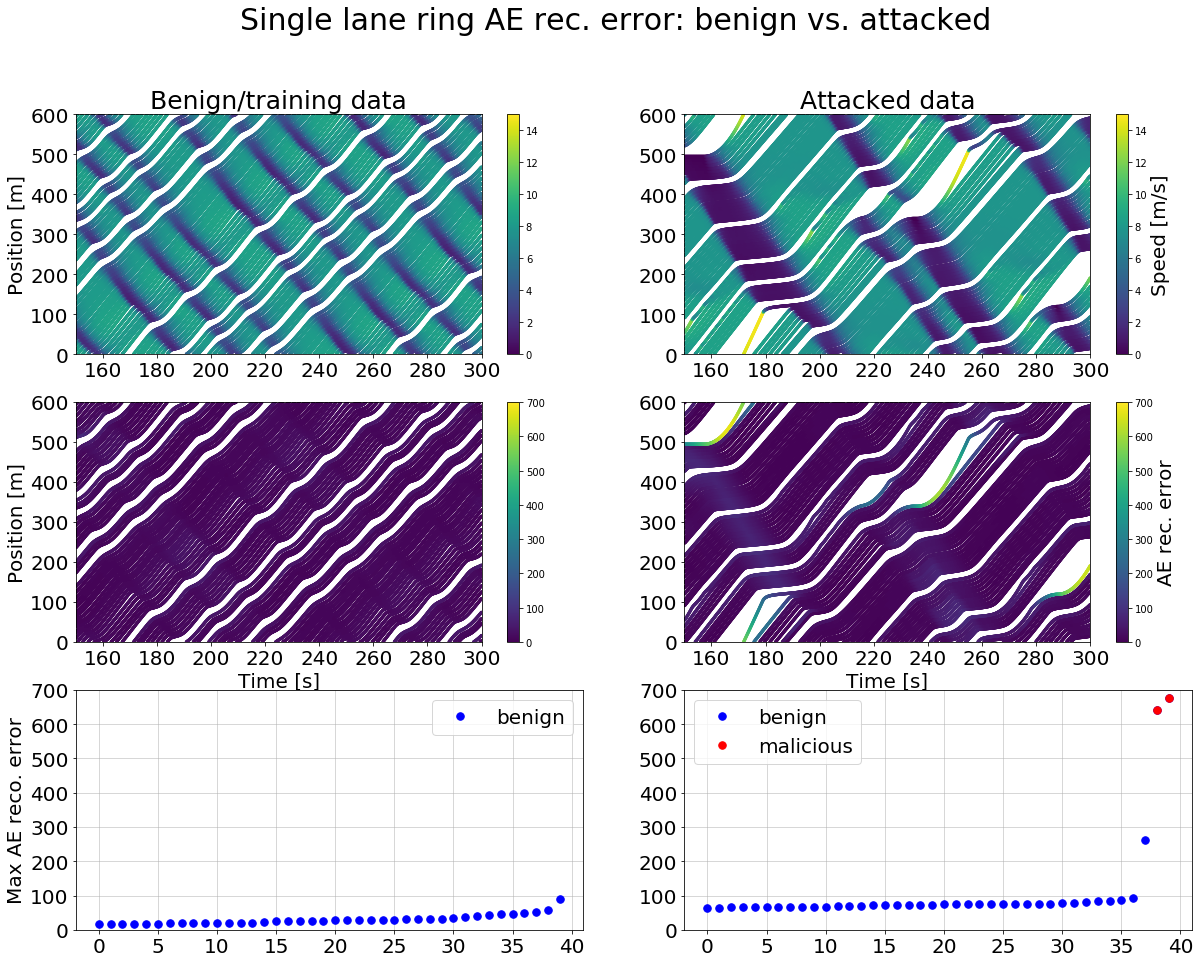

In [57]:
import matplotlib.pyplot as plt

from flow.visualize.visualize_ring import get_ring_positions,stack_data_for_spacetime

dot_size = 5.0
ring_length = 600

def plot_space_time_shaded_with_speed(sim_data_dict,csv_path):
    veh_ids = list(sim_data_dict.keys())
    ring_positions = get_ring_positions(sim_data_dict,csv_path,ring_length)
    times,positions,speeds = stack_data_for_spacetime(sim_data_dict,ring_positions)
    positions_mod_ring_length = np.mod(positions,ring_length)
    plt.scatter(times,positions_mod_ring_length,c=speeds,s=dot_size)
    
    
def plot_space_time_shaded_with_rec_err(sim_data_dict,csv_path,rec_error):
    veh_ids = list(sim_data_dict.keys())
    ring_positions = get_ring_positions(sim_data_dict,csv_path,ring_length)
    times,positions,speeds,losses = stack_data_for_spacetime(sim_data_dict,ring_positions,want_losses=True,losses_dict=rec_error)
    positions_mod_ring_length = np.mod(positions,ring_length)
    plt.scatter(times,positions_mod_ring_length,c=losses,s=dot_size)

    
def plot_max_losses(rec_error):
    veh_ids = list(rec_error)
    max_losses_all = []
    for veh_id in veh_ids:
        max_losses_all.append(np.max(rec_error[veh_id]))
    max_losses_all_sorted = np.sort(max_losses_all)
    plt.plot(max_losses_all_sorted,'b.',label = 'benign',markersize=15)
    num_vehicles = len(veh_ids)
    adv_indices = []
    j = 0
    for veh_id in veh_ids:
        if('adv' in veh_id):
            i = 0
            while(max_losses_all_sorted[i] != max_losses_all[j] and i<num_vehicles): i+= 1
            if(i<num_vehicles):
                adv_indices.append(i)
        j += 1
    if(len(adv_indices)>0):
        plt.plot(adv_indices,max_losses_all_sorted[adv_indices],'r.',label='malicious',markersize=15)
        
        
fontsize = 25
        
fig = plt.figure(figsize=[20,15])
plt.subplot(3,2,1)
plot_space_time_shaded_with_speed(sim_data_dict = no_attack_sim_data_dict,
                                  csv_path=no_attack_file_path)

plt.ylim([0,600])
plt.xlim([150,300])
plt.ylabel('Position [m]',fontsize=fontsize-5)
# plt.xlabel('Time [m]'fontsize=fontsize-5)
plt.title('Benign/training data',fontsize=fontsize)
cbar = plt.colorbar()
# cbar.set_label('Speed [m/s]',fontsize=fontsize-5)
cbar.ax.tick_params(labelsize=10)
plt.clim([0.0,15.0])
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)

plt.subplot(3,2,2)
plot_space_time_shaded_with_speed(sim_data_dict = attack_sim_data_dict,
                                  csv_path=attack_file_path)
plt.ylim([0,600])
plt.xlim([150,300])
plt.title('Attacked data',fontsize=fontsize)
cbar = plt.colorbar()
cbar.set_label('Speed [m/s]',fontsize=fontsize-5)
cbar.ax.tick_params(labelsize=10)
plt.clim([0.0,15.0])
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)

plt.subplot(3,2,3)
plot_space_time_shaded_with_rec_err(sim_data_dict = no_attack_sim_data_dict,
                                    csv_path=no_attack_file_path,
                                    rec_error=no_attack_losses_dict) 
plt.ylim([0,600])
plt.xlim([150,300])
plt.ylabel('Position [m]',fontsize=fontsize-5)
plt.xlabel('Time [s]',fontsize=fontsize-5)
# plt.title('Attacked data',fontsize=fontsize)
cbar = plt.colorbar()
# cbar.set_label('Speed [m/s]',fontsize=fontsize-5)
cbar.ax.tick_params(labelsize=10)
plt.clim([0.0,700.0])
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)


plt.subplot(3,2,4)
plot_space_time_shaded_with_rec_err(sim_data_dict = attack_sim_data_dict,
                                    csv_path=attack_file_path,
                                    rec_error=attack_losses_dict)
plt.ylim([0,600])
plt.xlim([150,300])
plt.xlabel('Time [s]',fontsize=fontsize-5)
cbar = plt.colorbar()
cbar.set_label('AE rec. error',fontsize=fontsize-5)
cbar.ax.tick_params(labelsize=10)
plt.clim([0.0,700.0])
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)

plt.subplot(3,2,5)
plot_max_losses(rec_error=no_attack_losses_dict)
plt.ylim([0.0,700.0])
plt.ylabel('Max AE reco. error',fontsize=fontsize-5)
plt.legend(fontsize=fontsize-5)
plt.grid(linewidth=0.5)
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)


plt.subplot(3,2,6)
plot_max_losses(rec_error=attack_losses_dict)
plt.ylim([0.0,700.0])
plt.legend(fontsize=fontsize-5)
plt.grid(linewidth=0.5)
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)
# plt.ylable('Max AE reco. error',fontsize=fontsize-5)

fig.suptitle('Single lane ring AE rec. error: benign vs. attacked',fontsize=fontsize+5)


In [112]:
warmup = 150.0

model = get_cnn_lstm_ae_model(n_features=4)

# Load in a trained model:
MODEL_PATH = '/Users/vanderbilt/Desktop/Research_2022/Anti-Flow/detector_dev/models/cnn_lstm_ae_ringlength600_1.0percentGPS.pt'
model.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device('cpu'))) 

no_attack_file_path = 'data/ring_variable_cfm_20220531-1050571654012257.826792-0_emission.csv'

no_attack_losses_dict = get_losses_complete_obs(no_attack_file_path,model,warmup_period=warmup)


Data loaded.
Vehicles processed: 80



In [113]:
attack_file_path = '/Volumes/My Passport for Mac/double_lane_ring_road_attack_parameter_sweep/ring_600m_double_lane_TAD_10.0_ADR_-0.75_ver_10.csv'

attack_losses_dict = get_losses_complete_obs(attack_file_path,model,warmup_period=warmup)

Data loaded.
Vehicles processed: 80



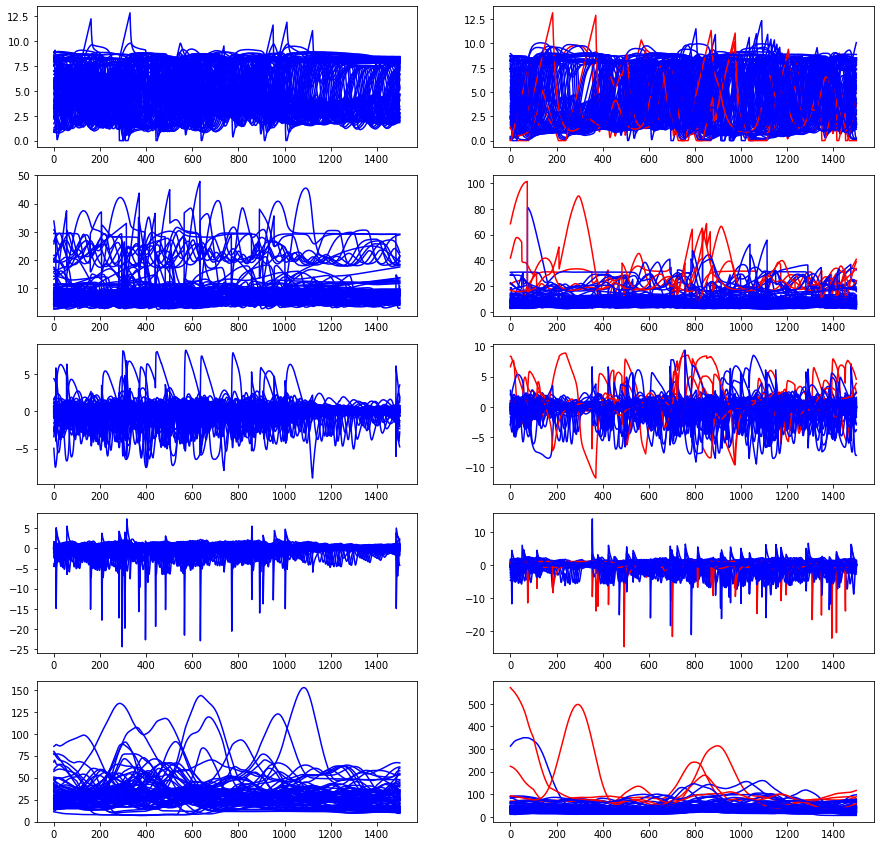

In [128]:
plt.figure(figsize=[15,15])

from scipy.signal import savgol_filter

# no_attack_sim_data_dict = get_sim_data_dict_ring(no_attack_file_path,warmup_period=warmup)

# attack_sim_data_dict = get_sim_data_dict_ring(attack_file_path,warmup_period=warmup)

num_fields = 5
temp_iter = 1

#Speeds:
plt.subplot(num_fields,2,temp_iter)
for veh_id in no_attack_sim_data_dict:
    speeds = []
    data = no_attack_sim_data_dict[veh_id]
    for row in data:
        speeds.append(float(row[4]))
        
    if('adv' in veh_id):
        plt.plot(speeds,'r')
    else:
        plt.plot(speeds,'b')    
temp_iter +=1
        
plt.subplot(num_fields,2,temp_iter)
for veh_id in attack_sim_data_dict:
    speeds = []
    data = attack_sim_data_dict[veh_id]
    for row in data:
        speeds.append(float(row[4]))
        
    if('adv' in veh_id):
        plt.plot(speeds,'r')
    else:
        plt.plot(speeds,'b')        
temp_iter +=1

#spacings:
plt.subplot(num_fields,2,temp_iter)
for veh_id in no_attack_sim_data_dict:
    spacings = []
    data = no_attack_sim_data_dict[veh_id]
    for row in data:
        spacings.append(float(row[5]))
        
    if('adv' in veh_id):
        plt.plot(spacings,'r')
    else:
        plt.plot(spacings,'b')    
temp_iter +=1
        
plt.subplot(num_fields,2,temp_iter)
for veh_id in attack_sim_data_dict:
    spacings = []
    data = attack_sim_data_dict[veh_id]
    for row in data:
        spacings.append(float(row[5]))
        
    if('adv' in veh_id):
        plt.plot(spacings,'r')
    else:
        plt.plot(spacings,'b')        
temp_iter +=1 

#relative speeds:
plt.subplot(num_fields,2,temp_iter)
for veh_id in no_attack_sim_data_dict:
    spacings = []
    data = no_attack_sim_data_dict[veh_id]
    for row in data:
        spacings.append(float(row[8]))
        
    if('adv' in veh_id):
        plt.plot(spacings,'r')
    else:
        plt.plot(spacings,'b')    
temp_iter +=1
        
plt.subplot(num_fields,2,temp_iter)
for veh_id in attack_sim_data_dict:
    spacings = []
    data = attack_sim_data_dict[veh_id]
    for row in data:
        spacings.append(float(row[8]))
        
    if('adv' in veh_id):
        plt.plot(spacings,'r')
    else:
        plt.plot(spacings,'b')        
temp_iter +=1  

#Acceleration:
plt.subplot(num_fields,2,temp_iter)
for veh_id in no_attack_sim_data_dict:
    speeds = []
    data = no_attack_sim_data_dict[veh_id]
    for row in data:
        speeds.append(float(row[4]))
    accel = np.gradient(speeds,0.1)
    if('adv' in veh_id):
        plt.plot(accel,'r')
    else:
        plt.plot(accel,'b')    
temp_iter +=1
        
plt.subplot(num_fields,2,temp_iter)
for veh_id in attack_sim_data_dict:
    speeds = []
    data = attack_sim_data_dict[veh_id]
    for row in data:
        speeds.append(float(row[4]))
    accel = np.gradient(speeds,0.1)
    if('adv' in veh_id):
        plt.plot(accel,'r')
    else:
        plt.plot(accel,'b')    
temp_iter +=1



#Losses:        
plt.subplot(num_fields,2,temp_iter)
for veh_id in no_attack_losses_dict:
    if('adv' in veh_id):
        plt.plot(no_attack_losses_dict[veh_id],'r')
    else:
        plt.plot(no_attack_losses_dict[veh_id],'b')
temp_iter +=1

plt.subplot(num_fields,2,temp_iter)
for veh_id in attack_losses_dict:
    if('adv' in veh_id):
        plt.plot(attack_losses_dict[veh_id],'r')
    else:
        plt.plot(attack_losses_dict[veh_id],'b')


In [114]:
def get_sim_data_dict_for_single_lane(csv_path,warmup_period=150.0,lane_num_desired=0):
    row_num = 1
    curr_veh_id = 'id'
    sim_dict = {}
    curr_veh_data = []

    with open(csv_path, newline='') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        row1 = next(csvreader)
        lane_index = 0
        num_entries = len(row1)
        while(row1[lane_index]!='lane_number' and lane_index<num_entries):lane_index +=1
        for row in csvreader:
                # Don't read header
                if(curr_veh_id != row[1]):
                    #Add in new data to the dictionary:
                    #Store old data:
                    if(len(curr_veh_data)>0):
                        sim_dict[curr_veh_id] = curr_veh_data
                    #Rest where data is being stashed:
                    curr_veh_data = []
                    curr_veh_id = row[1] # Set new veh id
                    #Allocate space for storing:
#                     sim_dict[curr_veh_id] = []

                curr_veh_id = row[1]
                time = float(row[0])
                lane = int(row[lane_index])
                if(time > warmup_period and lane == lane_num_desired):
                    curr_veh_data.append(row)

        #Add the very last vehicle's information:
        if(len(curr_veh_data)>0):
            sim_dict[curr_veh_id] = curr_veh_data
        # sys.stdout.write('\r'+'Veh id: '+curr_veh_id+ ' row: ' +str(row_num)+'\r')
        print('Data loaded.')
    return sim_dict

# no_attack_sim_data_dict = get_sim_data_dict_ring(no_attack_file_path,warmup_period=warmup)

# attack_sim_data_dict = get_sim_data_dict_ring(attack_file_path,warmup_period=warmup)



no_attack_sim_data_dict_lane_0 = get_sim_data_dict_for_single_lane(csv_path=no_attack_file_path,
                                                                   warmup_period=warmup,
                                                                   lane_num_desired=0)

attack_sim_data_dict_lane_0 = get_sim_data_dict_for_single_lane(csv_path=attack_file_path,
                                                                warmup_period=warmup,
                                                                lane_num_desired=0)



print('All double lane data loaded.')

Data loaded.
Data loaded.
All double lane data loaded.


(array([ 3.,  0.,  0.,  0.,  1.,  2.,  3.,  2.,  0.,  1.,  0.,  3.,  0.,
         0.,  0.,  2.,  3.,  0.,  0., 32.]),
 array([   9.  ,   83.55,  158.1 ,  232.65,  307.2 ,  381.75,  456.3 ,
         530.85,  605.4 ,  679.95,  754.5 ,  829.05,  903.6 ,  978.15,
        1052.7 , 1127.25, 1201.8 , 1276.35, 1350.9 , 1425.45, 1500.  ]),
 <a list of 20 Patch objects>)

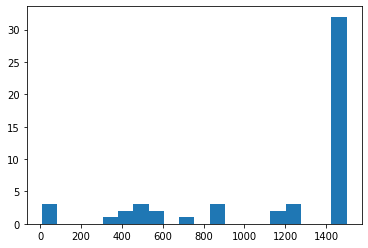

In [79]:
veh_ids = list(no_attack_sim_data_dict_lane_0.keys())
num_samples_list = []
for veh_id in veh_ids:
    sample_num = len(no_attack_sim_data_dict_lane_0[veh_id])
    if(sample_num == 0):print(veh_id)
    num_samples_list.append(sample_num)
    
plt.hist(num_samples_list,20)

In [116]:
def get_rec_errors_single_lane(sim_data_dict_single_lane,sim_data_dict,rec_error_dict):
    veh_ids_single_lane = list(sim_data_dict_single_lane.keys())
    single_lane_rec_errors = dict.fromkeys(veh_ids_single_lane)
    
    for veh_id in veh_ids_single_lane:
        rec_errors_single_lane = [] # For storing appropriate
        
        all_veh_data = sim_data_dict[veh_id]
        single_lane_veh_data = sim_data_dict_single_lane[veh_id]
        
        temp_iter = 0
        total_samples_single_lane = len(single_lane_veh_data)
        for i in range(total_samples_single_lane):
            t_single = single_lane_veh_data[i][0]
            while(all_veh_data[temp_iter][0]!=t_single and temp_iter<total_samples_single_lane):
                temp_iter += 1
            rec_errors_single_lane.append(rec_error_dict[veh_id][temp_iter])
            
        single_lane_rec_errors[veh_id] = np.array(rec_errors_single_lane)
        
    return single_lane_rec_errors

no_attack_losses_dict_lane_0 = get_rec_errors_single_lane(sim_data_dict_single_lane=no_attack_sim_data_dict_lane_0,
                                                          sim_data_dict=no_attack_sim_data_dict,
                                                          rec_error_dict=no_attack_losses_dict)


attack_losses_dict_lane_0 = get_rec_errors_single_lane(sim_data_dict_single_lane=attack_sim_data_dict_lane_0,
                                                       sim_data_dict=attack_sim_data_dict,
                                                       rec_error_dict=attack_losses_dict)


print('Finished.')

Finished.


In [117]:
sim_data_dict = no_attack_sim_data_dict_lane_0
csv_path = no_attack_file_path
ring_length = 600
warmup_period = 150
rec_error = no_attack_losses_dict_lane_0

veh_ids = list(sim_data_dict.keys())
ring_positions = get_ring_positions(sim_data_dict,csv_path,ring_length)
print(len(ring_positions))
times,positions,speeds,losses = stack_data_for_spacetime(sim_data_dict,ring_positions,want_losses=True,losses_dict=rec_error)
print(len(times))
print(len(positions))
print(len(speeds))
print(len(losses))

positions_mod_ring_length = np.mod(positions,ring_length)
# plt.scatter(times,positions_mod_ring_length,c=losses,s=dot_size)

52
61262
61262
61262
61262


(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text yticklabel objects>)

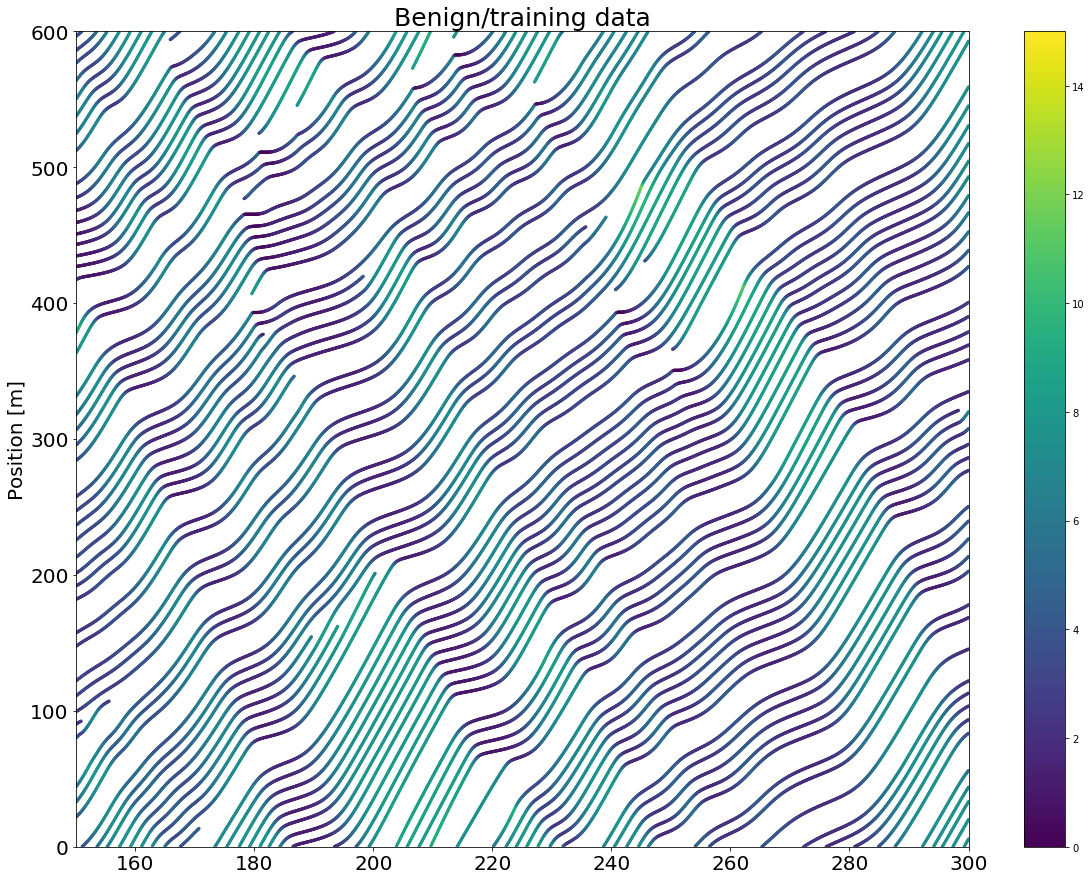

In [80]:

            
            
        



def plot_space_time_shaded_with_speed(sim_data_dict,csv_path):
    veh_ids = list(sim_data_dict.keys())
    ring_positions = get_ring_positions(sim_data_dict,csv_path,ring_length)
    times,positions,speeds = stack_data_for_spacetime(sim_data_dict,ring_positions)
    positions_mod_ring_length = np.mod(positions,ring_length)
    plt.scatter(times,positions_mod_ring_length,c=speeds,s=dot_size)
    
    
def plot_space_time_shaded_with_rec_err(sim_data_dict,csv_path,rec_error):
    veh_ids = list(sim_data_dict.keys())
    ring_positions = get_ring_positions(sim_data_dict,csv_path,ring_length)
    times,positions,speeds,losses = stack_data_for_spacetime(sim_data_dict,ring_positions,want_losses=True,losses_dict=rec_error)
    positions_mod_ring_length = np.mod(positions,ring_length)
    plt.scatter(times,positions_mod_ring_length,c=losses,s=dot_size)
    
    
fig = plt.figure(figsize=[20,15])
# plt.subplot(3,2,1)
plot_space_time_shaded_with_speed(sim_data_dict = no_attack_sim_data_dict_lane_0,
                                  csv_path=no_attack_file_path)

plt.ylim([0,600])
plt.xlim([150,300])
plt.ylabel('Position [m]',fontsize=fontsize-5)
# plt.xlabel('Time [m]'fontsize=fontsize-5)
plt.title('Benign/training data',fontsize=fontsize)
cbar = plt.colorbar()
# cbar.set_label('Speed [m/s]',fontsize=fontsize-5)
cbar.ax.tick_params(labelsize=10)
plt.clim([0.0,15.0])
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)    


In [111]:
veh_ids = list(attack_sim_data_dict_lane_0.keys())

for veh_id in veh_ids:
    if('adv' in veh_id): print(veh_id)

RDA_adv_TDA_10.0_ADR_-0.75_k1_1.04_k2_0.47_h_1.88_Vm_15.72_dm_10.0_1


Text(0.5, 0.98, 'Two lane ring (right lane shown) AE rec. error: benign vs. attacked')

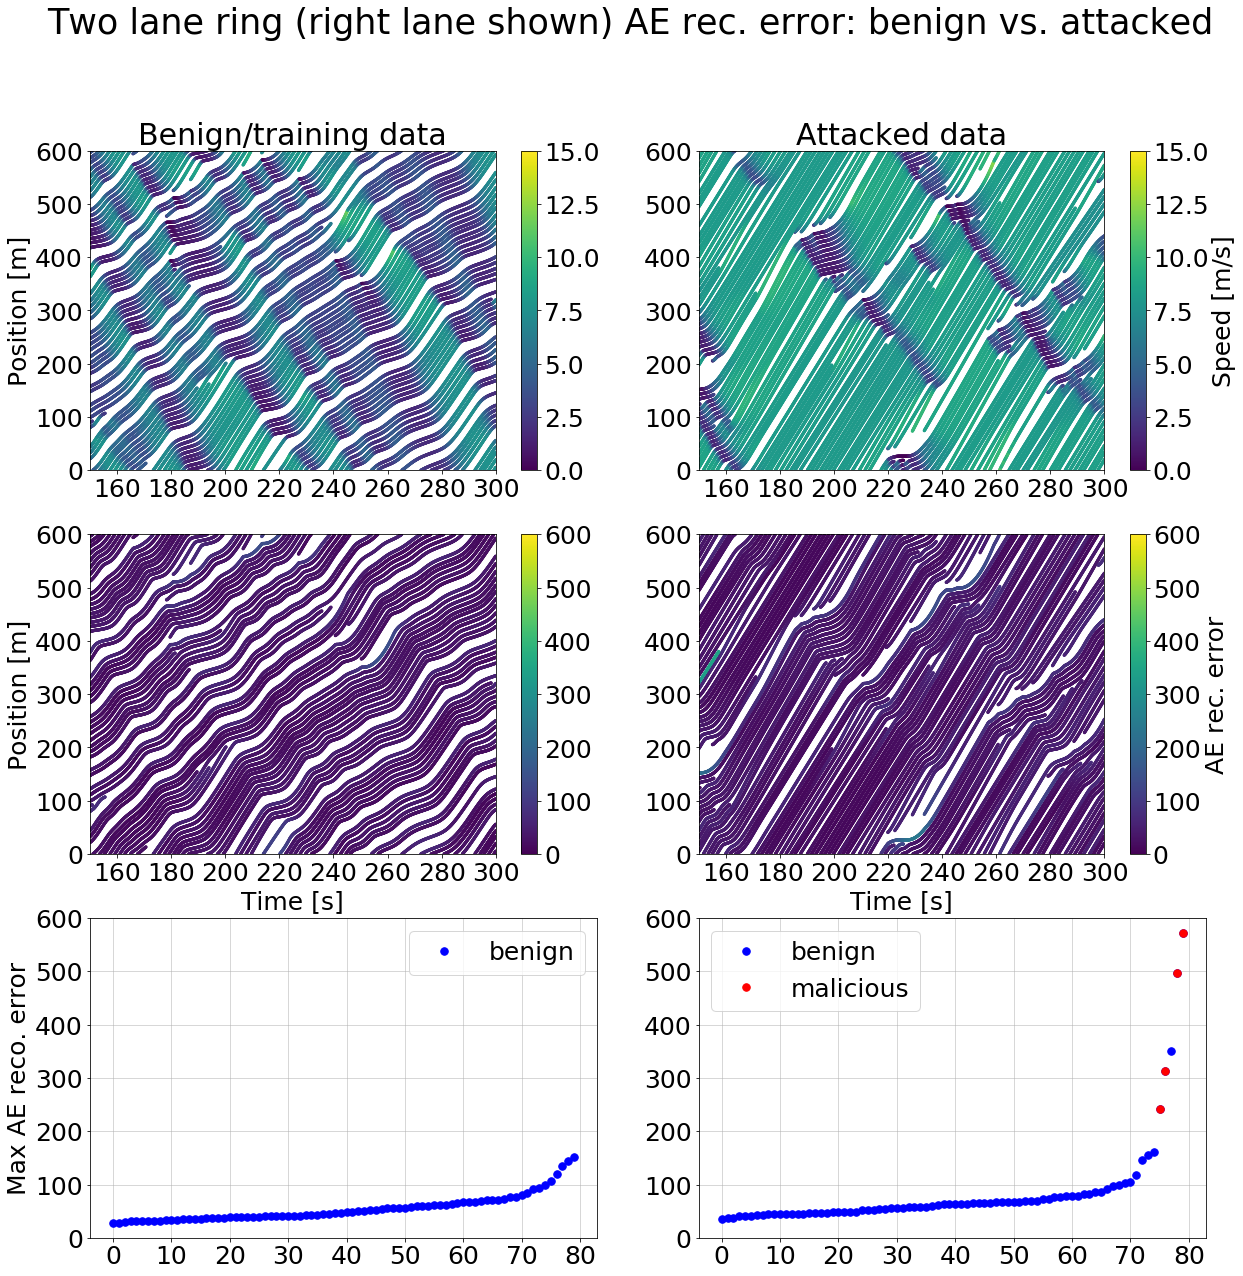

In [120]:
fontsize = 30
        
fig = plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
plot_space_time_shaded_with_speed(sim_data_dict = no_attack_sim_data_dict_lane_0,
                                  csv_path=no_attack_file_path)

plt.ylim([0,600])
plt.xlim([150,300])
plt.ylabel('Position [m]',fontsize=fontsize-5)
# plt.xlabel('Time [m]'fontsize=fontsize-5)
plt.title('Benign/training data',fontsize=fontsize)
cbar = plt.colorbar()
# cbar.set_label('Speed [m/s]',fontsize=fontsize-5)
cbar.ax.tick_params(labelsize=fontsize-5)
plt.clim([0.0,15.0])
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)

plt.subplot(3,2,2)
plot_space_time_shaded_with_speed(sim_data_dict = attack_sim_data_dict_lane_0,
                                  csv_path=attack_file_path)
plt.ylim([0,600])
plt.xlim([150,300])
plt.title('Attacked data',fontsize=fontsize)
cbar = plt.colorbar()
cbar.set_label('Speed [m/s]',fontsize=fontsize-5)
cbar.ax.tick_params(labelsize=fontsize-5)
plt.clim([0.0,15.0])
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)

plt.subplot(3,2,3)
plot_space_time_shaded_with_rec_err(sim_data_dict = no_attack_sim_data_dict_lane_0,
                                    csv_path=no_attack_file_path,
                                    rec_error=no_attack_losses_dict_lane_0) 
plt.ylim([0,600])
plt.xlim([150,300])
plt.ylabel('Position [m]',fontsize=fontsize-5)
plt.xlabel('Time [s]',fontsize=fontsize-5)
# plt.title('Attacked data',fontsize=fontsize)
cbar = plt.colorbar()
# cbar.set_label('Speed [m/s]',fontsize=fontsize-5)
cbar.ax.tick_params(labelsize=fontsize-5)
plt.clim([0.0,600.0])
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)


plt.subplot(3,2,4)
plot_space_time_shaded_with_rec_err(sim_data_dict = attack_sim_data_dict_lane_0,
                                    csv_path=attack_file_path,
                                    rec_error=attack_losses_dict_lane_0)
plt.ylim([0,600])
plt.xlim([150,300])
plt.xlabel('Time [s]',fontsize=fontsize-5)
cbar = plt.colorbar()
cbar.set_label('AE rec. error',fontsize=fontsize-5)
cbar.ax.tick_params(labelsize=fontsize-5)
plt.clim([0.0,600.0])
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)

plt.subplot(3,2,5)
plot_max_losses(rec_error=no_attack_losses_dict)
plt.ylim([0.0,600.0])
plt.ylabel('Max AE reco. error',fontsize=fontsize-5)
plt.legend(fontsize=fontsize-5)
plt.grid(linewidth=0.5)
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)


plt.subplot(3,2,6)
plot_max_losses(rec_error=attack_losses_dict)
plt.ylim([0.0,600.0])
plt.legend(fontsize=fontsize-5)
plt.grid(linewidth=0.5)
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)
# plt.ylable('Max AE reco. error',fontsize=fontsize-5)

fig.suptitle('Two lane ring (right lane shown): benign vs. attacked',fontsize=fontsize+5)